In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

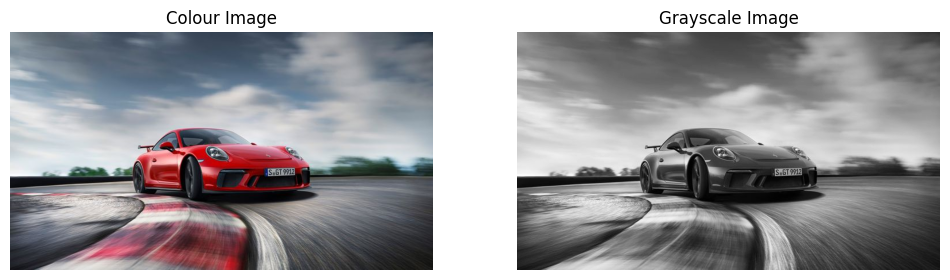

In [8]:
# Question 1.1: Take an image, read it in color and grayscale
image = cv2.imread(r'C:\Users\chaba\OneDrive\Skrivebord\MAS512_local\Assignment1\images\porche_red.jpeg')
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the color and grayscale images side by side (Figure 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Colour Image')
ax[0].axis('off')

ax[1].imshow(image_grayscale, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()

In [9]:
# Question 1.2 - Adding Gaussian noise to the grayscale image
mean = 0
stddev = 25
noise = np.random.normal(mean, stddev, image_grayscale.shape)
noisy_image = image_grayscale + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)


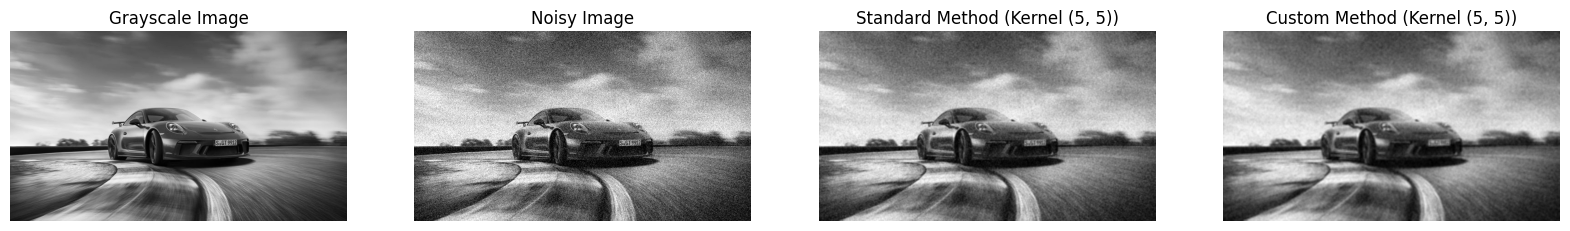

In [10]:
# Question 1.3 & 1.4: Noise removal using standard (Gaussian Blur) and custom kernel methods
def custom_kernel_blur(image, kernel_size):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    return cv2.filter2D(image, -1, kernel)

# Apply noise removal with kernel (5,5)
kernel_size = (5, 5)
noiseremove_image_standard = cv2.GaussianBlur(noisy_image, kernel_size, 0)
noiseremove_image_kernel = custom_kernel_blur(noisy_image, kernel_size)

# Display Grayscale, Noisy, Standard noise removal, and Custom noise removal (Figure 2)
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

ax[0].imshow(image_grayscale, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

ax[2].imshow(noiseremove_image_standard, cmap='gray')
ax[2].set_title(f'Standard Method (Kernel {kernel_size})')
ax[2].axis('off')

ax[3].imshow(noiseremove_image_kernel, cmap='gray')
ax[3].set_title(f'Custom Method (Kernel {kernel_size})')
ax[3].axis('off')

plt.show()

SSIM (Gaussian Blur): 0.7025
SSIM (Custom Kernel): 0.7430


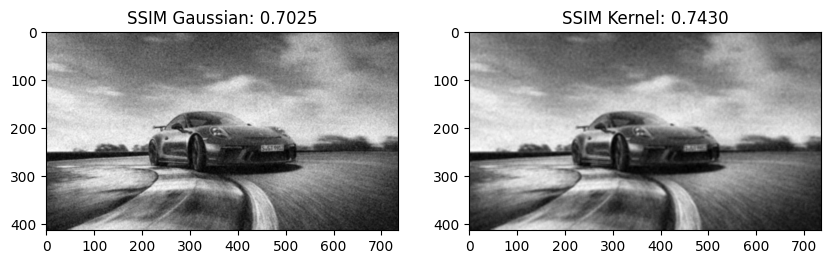

In [11]:
# Question 1.5 - SSIM comparison between the two methods
ssim_standard = ssim(image_grayscale, noiseremove_image_standard)
ssim_kernel = ssim(image_grayscale, noiseremove_image_kernel)

print(f'SSIM (Gaussian Blur): {ssim_standard:.4f}')
print(f'SSIM (Custom Kernel): {ssim_kernel:.4f}')

# Plot the comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(noiseremove_image_standard, cmap='gray')
ax[0].set_title(f'SSIM Gaussian: {ssim_standard:.4f}')

ax[1].imshow(noiseremove_image_kernel, cmap='gray')
ax[1].set_title(f'SSIM Kernel: {ssim_kernel:.4f}')

plt.show()

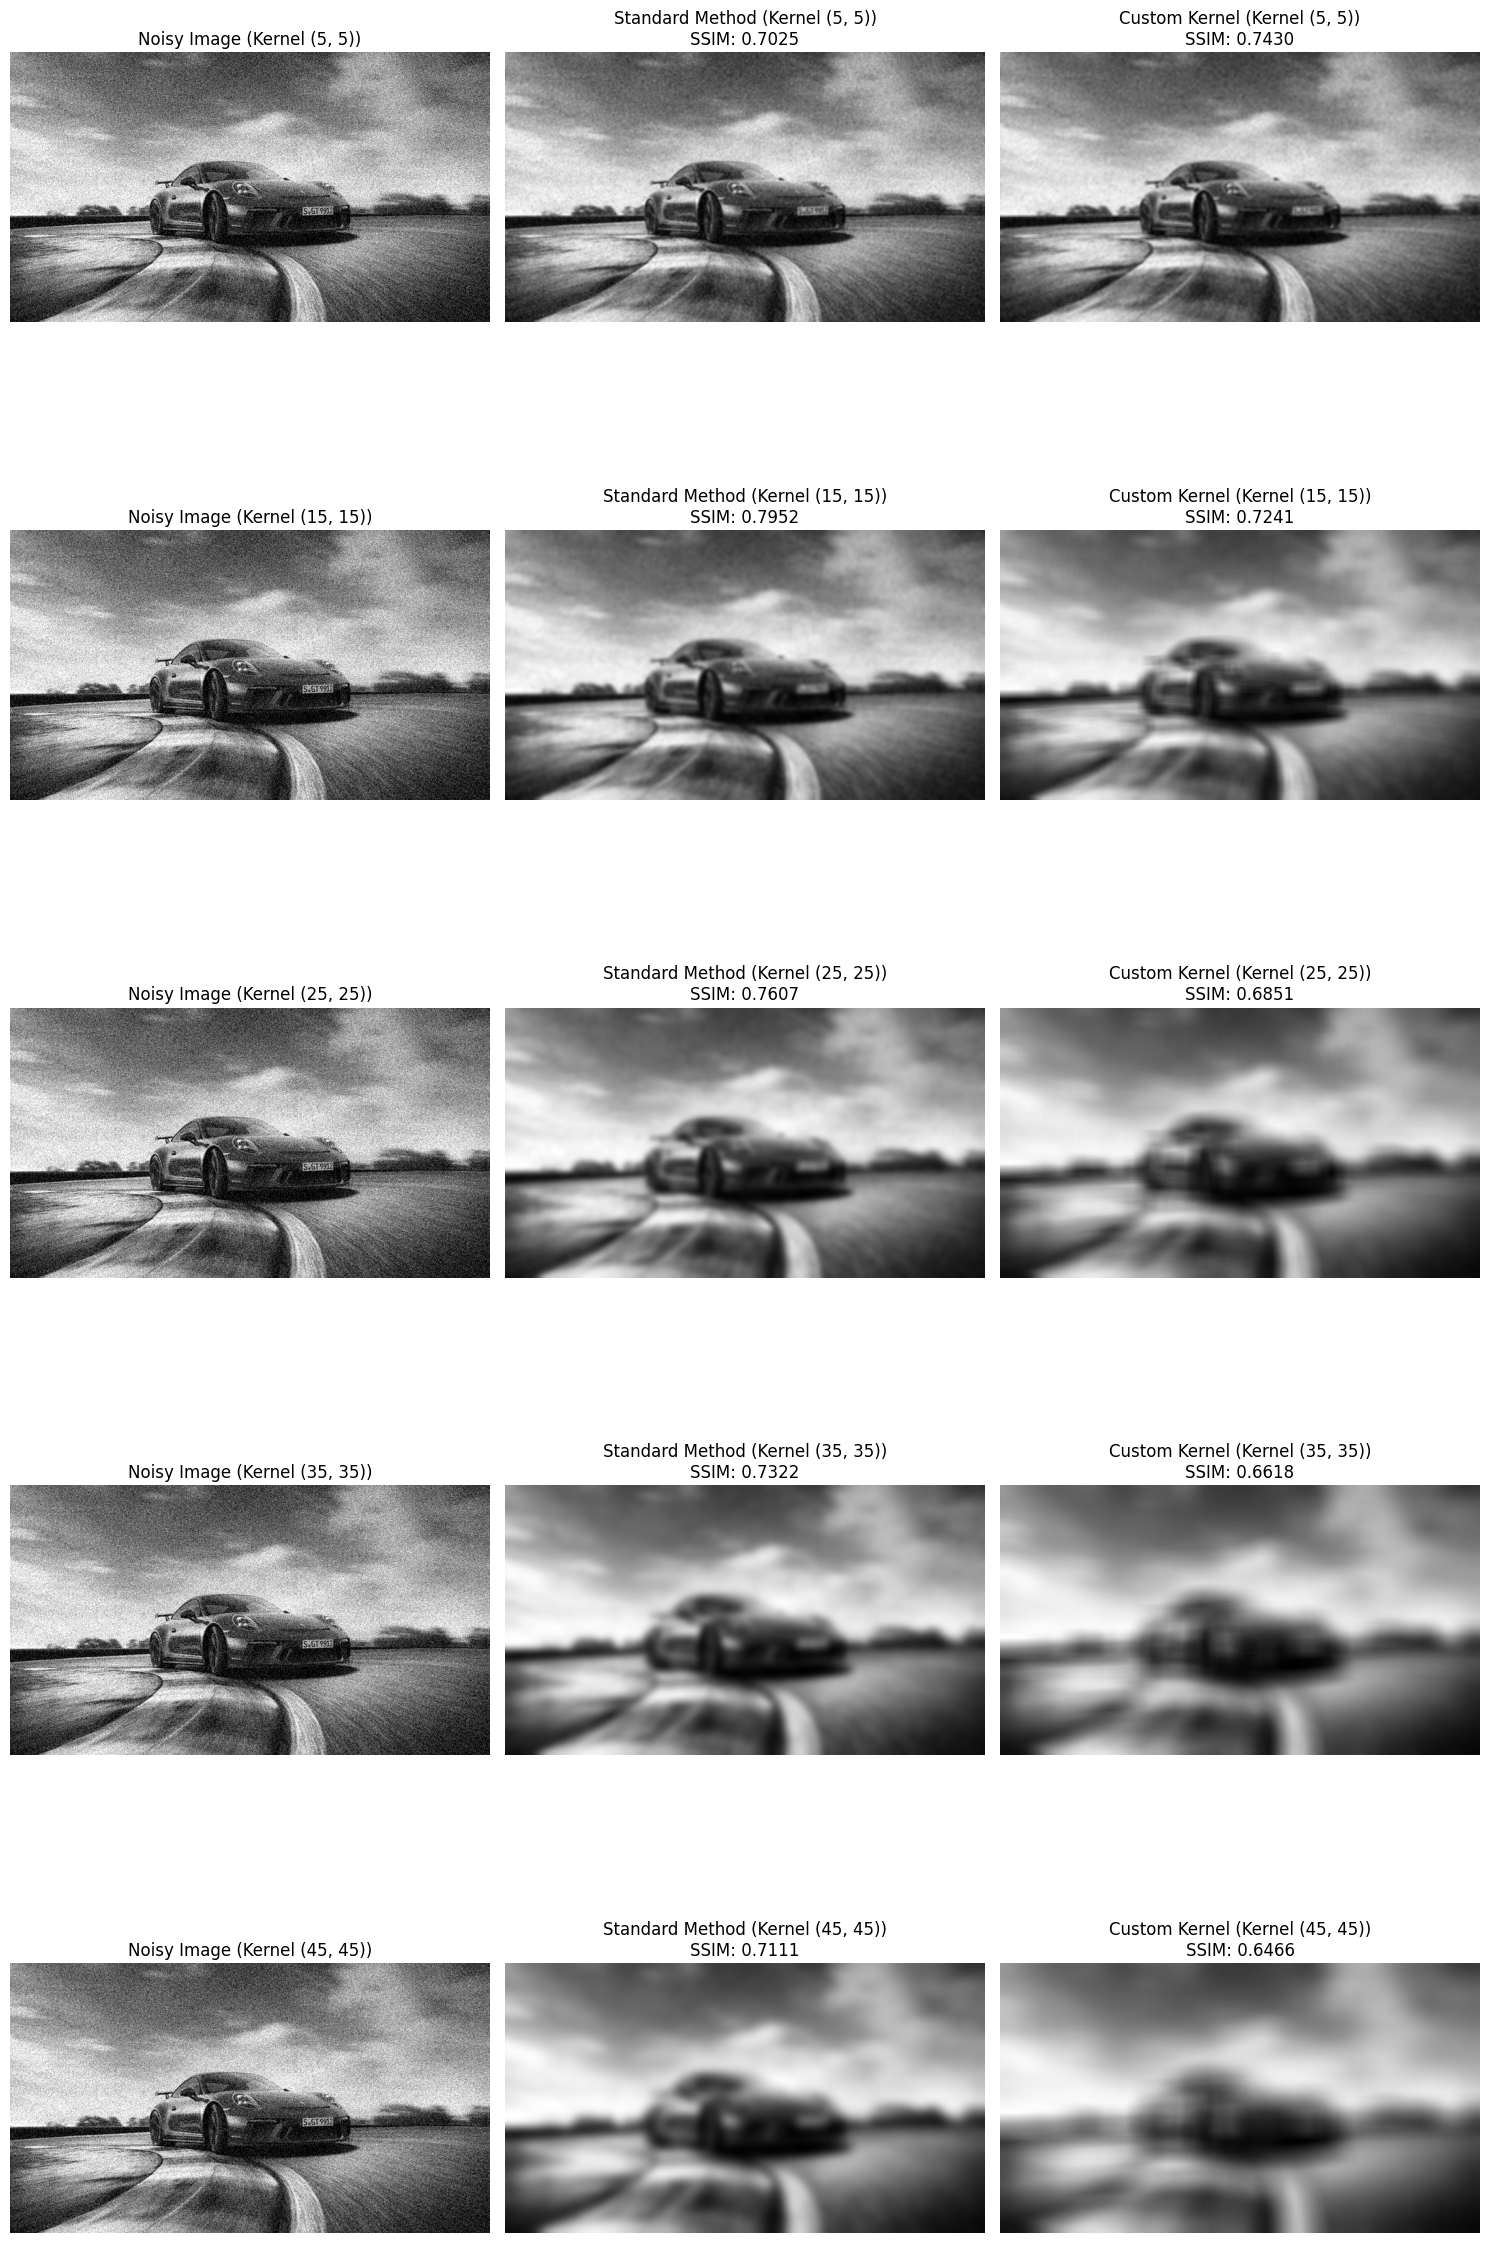

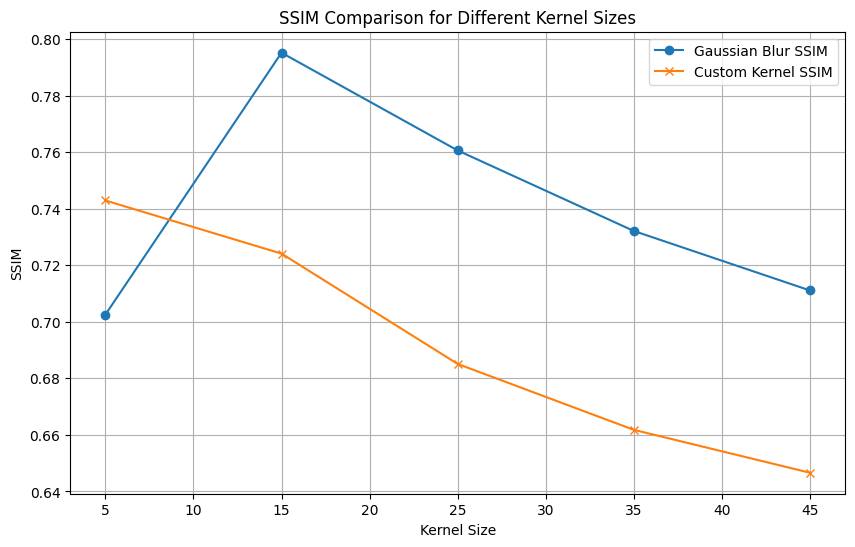

In [12]:
# Question 1.6: Create an array of kernel sizes (from 5 to 50, step 10 with odd values)
kernel_sizes = [(i, i) for i in range(5, 55, 10)]  # [(5, 5), (15, 15), ..., (45, 45)]

# Initialize lists to store SSIM values for each method
ssim_standard_list = []
ssim_kernel_list = []

# Plot the results in a single figure with multiple subplots
fig, ax = plt.subplots(len(kernel_sizes), 3, figsize=(15, len(kernel_sizes) * 5))

for i, kernel_size in enumerate(kernel_sizes):
    # Apply Gaussian Blur (Standard method)
    noiseremove_image_standard = cv2.GaussianBlur(noisy_image, kernel_size, 0)
    
    # Apply Custom Kernel Blur
    noiseremove_image_kernel = custom_kernel_blur(noisy_image, kernel_size)
    
    # Compute SSIM for both methods
    ssim_standard = ssim(image_grayscale, noiseremove_image_standard)
    ssim_kernel = ssim(image_grayscale, noiseremove_image_kernel)
    
    # Store SSIM values for plotting later
    ssim_standard_list.append(ssim_standard)
    ssim_kernel_list.append(ssim_kernel)
    
    # Plot results for each kernel size
    ax[i, 0].imshow(noisy_image, cmap='gray')
    ax[i, 0].set_title(f'Noisy Image (Kernel {kernel_size})')
    ax[i, 0].axis('off')
    
    ax[i, 1].imshow(noiseremove_image_standard, cmap='gray')
    ax[i, 1].set_title(f'Standard Method (Kernel {kernel_size})\nSSIM: {ssim_standard:.4f}')
    ax[i, 1].axis('off')
    
    ax[i, 2].imshow(noiseremove_image_kernel, cmap='gray')
    ax[i, 2].set_title(f'Custom Kernel (Kernel {kernel_size})\nSSIM: {ssim_kernel:.4f}')
    ax[i, 2].axis('off')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Plot SSIM comparison for different kernel sizes
plt.figure(figsize=(10, 6))
plt.plot([size[0] for size in kernel_sizes], ssim_standard_list, label='Gaussian Blur SSIM', marker='o')
plt.plot([size[0] for size in kernel_sizes], ssim_kernel_list, label='Custom Kernel SSIM', marker='x')
plt.xlabel('Kernel Size')
plt.ylabel('SSIM')
plt.title('SSIM Comparison for Different Kernel Sizes')
plt.legend()
plt.grid(True)
plt.show()
